# TKO_7093 Statistical Data Analysis 2023 Project



### **Report on the course Statistical Data Analysis project for the autumn 2023 semester at UTU.**

The course instructor launched a rental service of electric bikes this year and asked us to analyse the data collected. He gave us the file bikes.data from our maintenance team. They said it contains all the data recorded by their bikes. Since there is no information about who rented the bikes, we can assume that each trip was made by a different person.  The following are the variables of the dataset and their description


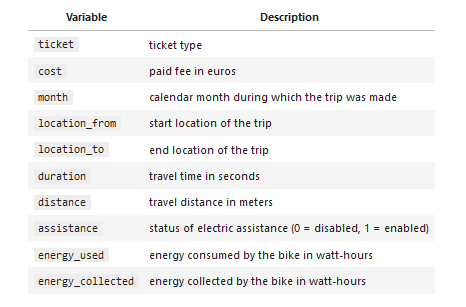

## **Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


## **Data Preparation**

The file bikes.data contains data that was collected directly from the recording devices of the bikes. No preprocessing or filtering has been done. The data may therefore contain irrelevant records, such as customers only trying out how bikes can be rented with our Android app and cancelling the transaction without actually riding the bike. Furthermore, the maintenance team reported that they had quite a few technical problems with the bikes, which may have resulted in invalid values in the data. So, you need to load and clean up the data before you can perform the statistical analysis.

## 1. Load the data from the file bikes.data. Check that the variables match the documentation above.

In [2]:
bikes=pd.read_csv("bikes.data", sep=",")
bikes.head(10)

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
5,single,1.00,6,NEULAMÄKI,TORI,1185.0,3280,1,21.2,0.0
6,single,0.70,8,KEILANKANTA,TASAVALLANKATU,817.0,4470,1,27.6,0.6
7,single,0.35,7,PUIJONLAAKSO,MICROTEKNIA,413.0,2150,1,14.5,10.2
8,season,0.00,6,NEULAMÄKI,TORI,797.0,4490,1,25.4,12.0
9,savonia,0.00,9,TORI,TORI,5.0,0,0,0.0,0.0


Here, we have loaded our data and visualized the top 10 rows and analyzed that the variables match the documentation.

In [3]:
quantitative = ['cost', 'duration', 'distance', 'energy_used', 'energy_collected']
categorical = ['ticket', 'month', 'location_from', 'location_to', 'assistance']

For our data, the categorical values are:
ticket, month, location_from, location_to, assistance

and quantitative values are:
cost, distance, duration, energy_used, energy_collected

We also checked the data types if they are appropriate.

In [4]:
print("Data types before alteration: ")
print(bikes.dtypes)

Data types before alteration: 
ticket               object
cost                float64
month                 int64
location_from        object
location_to          object
duration            float64
distance              int64
assistance            int64
energy_used         float64
energy_collected    float64
dtype: object


There are undoubtedly some categorical and some qualitative variables present, thus the next step will be to change the categorical variable columns to categorical type and verify their types and distinct values. So we iterate through each categorical column and convert them as category since they were object type before. No change has to be done to the quantitative ones as they were already in their appropriate form.

In [5]:
for col in categorical:
    bikes[col]=bikes[col].astype("category")

print("Data types after alteration: ")
print(bikes.dtypes)

Data types after alteration: 
ticket              category
cost                 float64
month               category
location_from       category
location_to         category
duration             float64
distance               int64
assistance          category
energy_used          float64
energy_collected     float64
dtype: object


In order to find out any anomalies in the data, we find iut how many and what kinds of values/categories exist for different columns and also find unique values for some columns.

In [6]:
bikes.value_counts()

ticket   cost    month  location_from   location_to     duration  distance  assistance  energy_used  energy_collected
single   0.75    7      SATAMA          PUIJONLAAKSO    887.0     3360      1           45.0         5.7                 2
         0.05    6      PUIJONLAAKSO    PUIJONLAAKSO    21.0      0         1           0.0          0.0                 2
savonia  100.00  9      NEULAMÄKI       MICROTEKNIA     25614.0   2310      0           0.0          3.6                 2
season   0.00    5      KAUPPAKATU      TASAVALLANKATU  351.0     1610      1           11.9         2.7                 2
savonia  0.00    9      NEULAMÄKI       MICROTEKNIA     250.0     1400      0           0.0          6.9                 2
                                                                                                                        ..
season   0.00    7      TORI            TORI            47.0      0         1           0.0          0.0                 1
                     

In [7]:
bikes["location_from"].unique()

['MICROTEKNIA', 'SATAMA', 'TASAVALLANKATU', 'TORI', 'NEULAMÄKI', 'KEILANKANTA', 'PUIJONLAAKSO', 'KAUPPAKATU', 'KYS', 'PIRTTI']
Categories (10, object): ['KAUPPAKATU', 'KEILANKANTA', 'KYS', 'MICROTEKNIA', ..., 'PUIJONLAAKSO', 'SATAMA', 'TASAVALLANKATU', 'TORI']

In [8]:
bikes["location_to"].unique()

['PUIJONLAAKSO', 'KEILANKANTA', 'NEULAMÄKI', 'KAUPPAKATU', 'TORI', 'TASAVALLANKATU', 'MICROTEKNIA', 'SATAMA', 'PIRTTI', 'KYS']
Categories (10, object): ['KAUPPAKATU', 'KEILANKANTA', 'KYS', 'MICROTEKNIA', ..., 'PUIJONLAAKSO', 'SATAMA', 'TASAVALLANKATU', 'TORI']

In [9]:
bikes["assistance"].unique()

[1, 0]
Categories (2, int64): [0, 1]

Then we see if there is any null values

In [10]:
nan_in_df = bikes.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 0


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            1774 non-null   category
 1   cost              1774 non-null   float64 
 2   month             1774 non-null   category
 3   location_from     1774 non-null   category
 4   location_to       1774 non-null   category
 5   duration          1774 non-null   float64 
 6   distance          1774 non-null   int64   
 7   assistance        1774 non-null   category
 8   energy_used       1774 non-null   float64 
 9   energy_collected  1774 non-null   float64 
dtypes: category(5), float64(4), int64(1)
memory usage: 79.4 KB


Then we found out the "bikes" DataFrame's information, including the index dtype and columns, non-null data, and memory use.

In [12]:
bikes.describe()

,cost,duration,distance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,671.323563,2460.067644,17.399493,5.639290
std,4.127344,1141.708627,2352.529305,17.194463,6.379593
min,0.000000,2.000000,-3380.000000,0.000000,0.000000
25%,0.000000,245.250000,910.000000,1.425000,0.600000
50%,0.050000,546.500000,2030.000000,14.350000,3.900000
75%,0.550000,877.750000,3605.000000,26.900000,8.325000
max,100.000000,25614.000000,20770.000000,144.900000,56.400000


Then we generated descriptive statistics using Pandas describe() function which is used to display some basic statistical information of a data frame or a sequence of numeric values, such as percentile, mean, standard deviation, min, max, count for different locations and so on. This is usually done not only to have a general overview, but also to find out anomalies in the data.

In [13]:
#sns.boxplot(df.distance)

## 2. Use both visualisations and numerical summaries to explore the variables. Filter out irrelevant records and process invalid values, if any. Explain why the records are irrelevant or the values invalid. Also explain how the modifications you made to the data fix the problems.

So we used both visualisations and numerical summaries to explore the categorical and quantitative variables. We iterate through each type and use seaborn histograms for quantitative variables and seaborn countplot for categorical variables.

<Figure size 640x480 with 0 Axes>

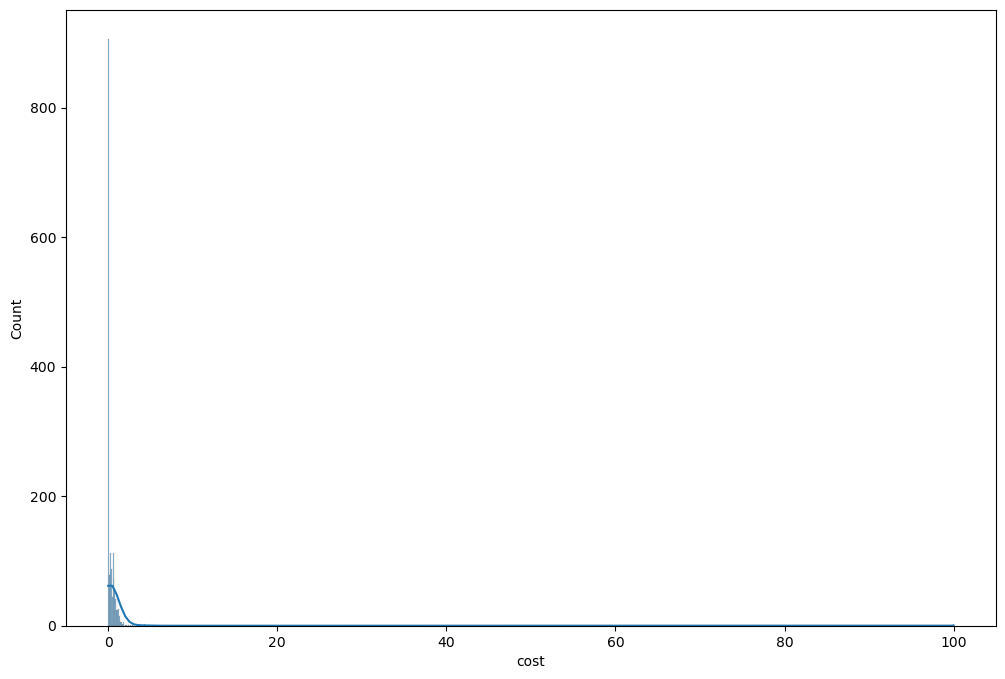

<Figure size 640x480 with 0 Axes>

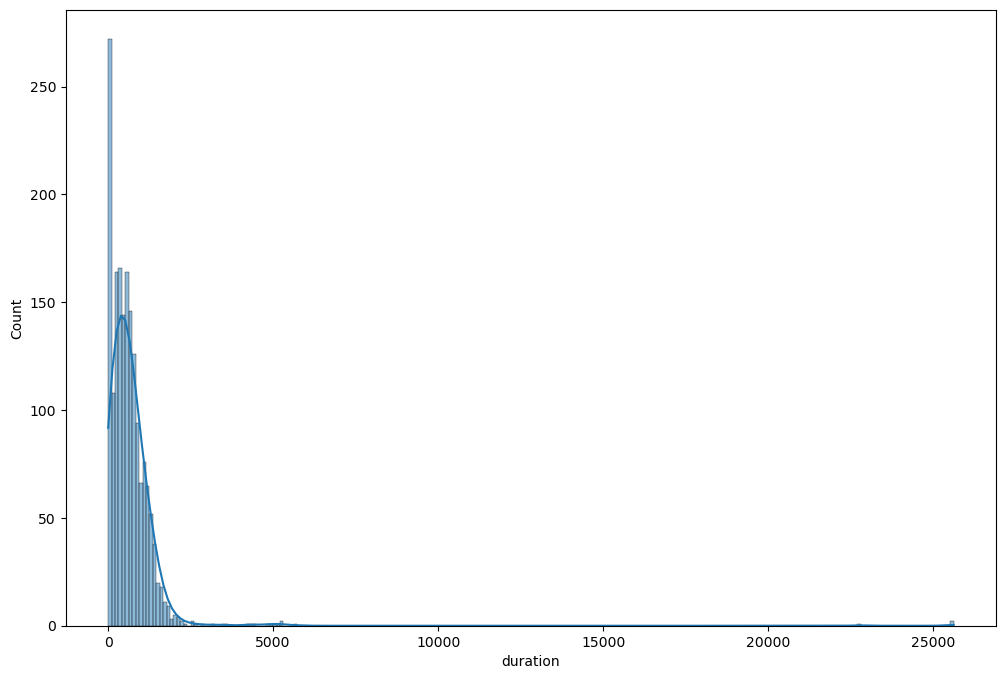

<Figure size 640x480 with 0 Axes>

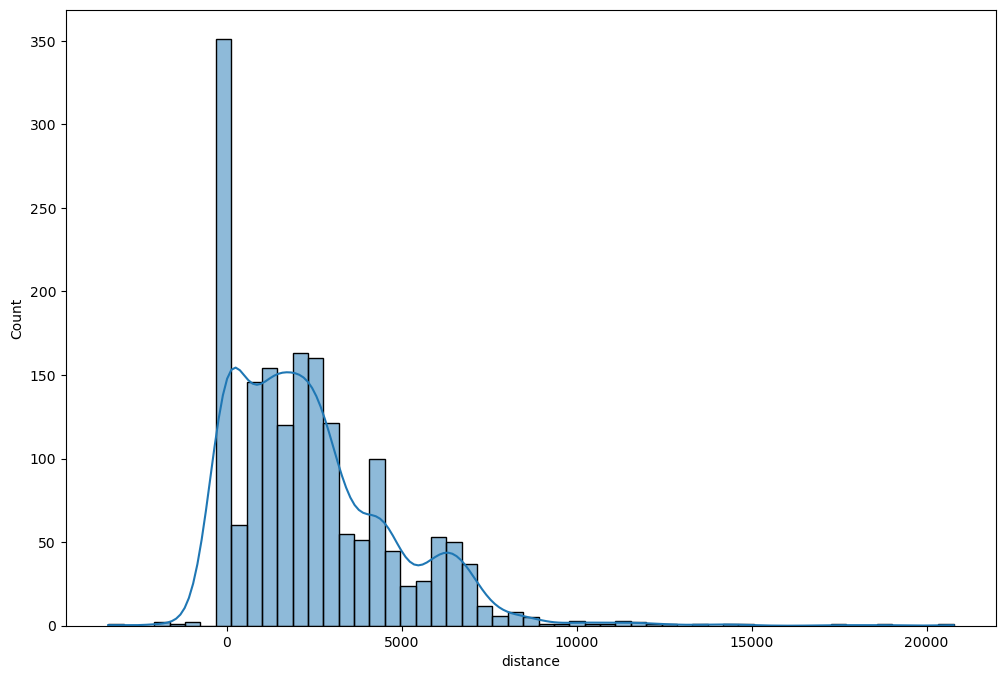

<Figure size 640x480 with 0 Axes>

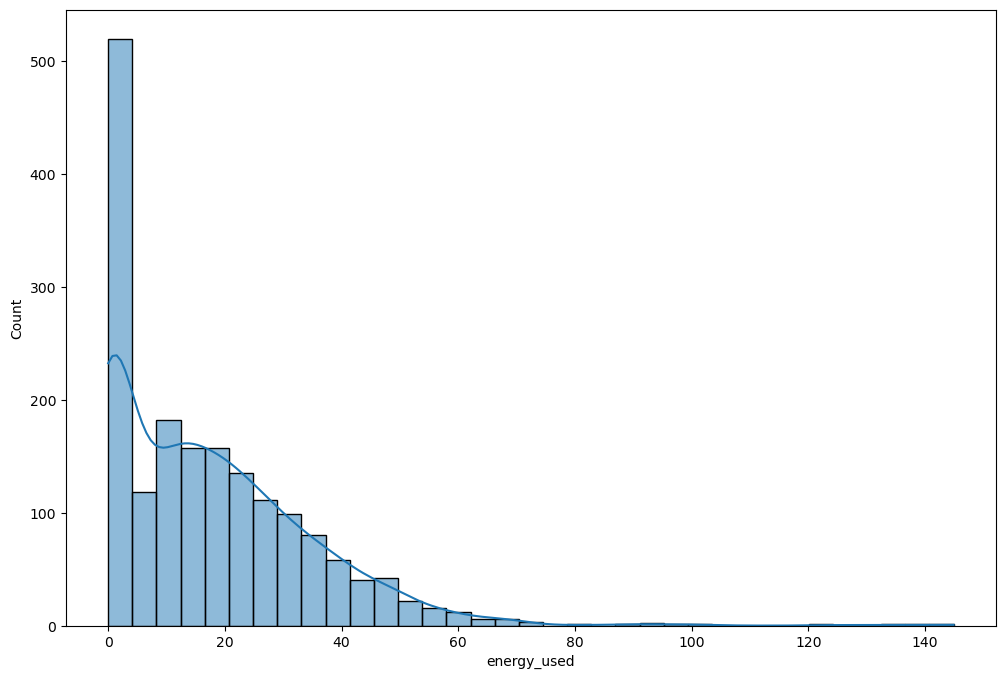

<Figure size 640x480 with 0 Axes>

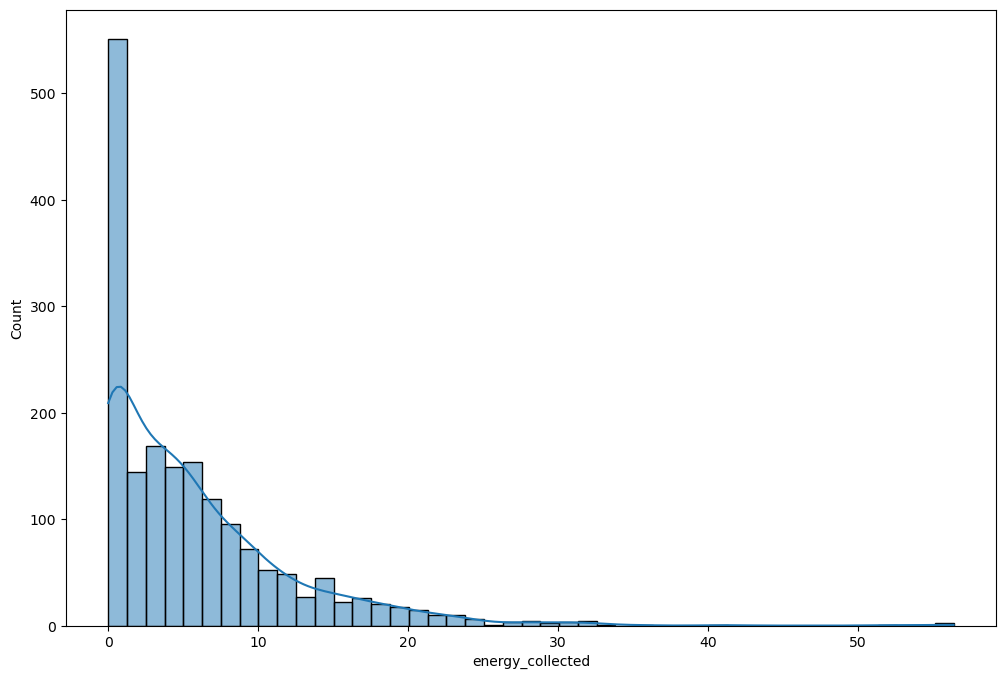

In [14]:


for col in quantitative:
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(data=bikes, x=col, kde=True, ax=ax)






<Figure size 640x480 with 0 Axes>

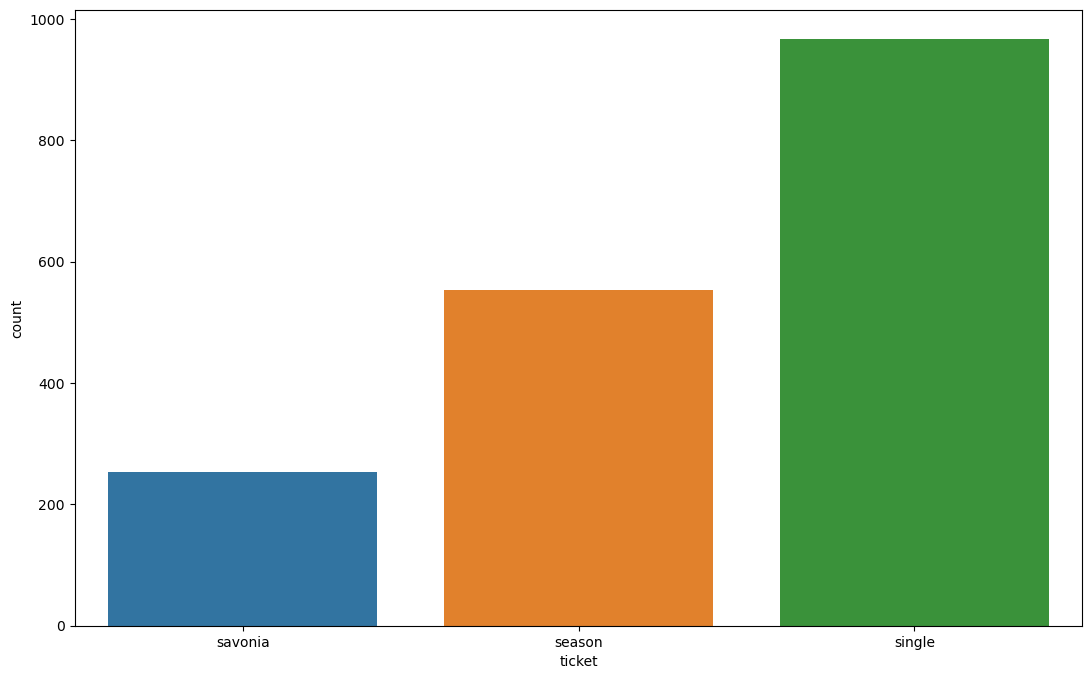

<Figure size 640x480 with 0 Axes>

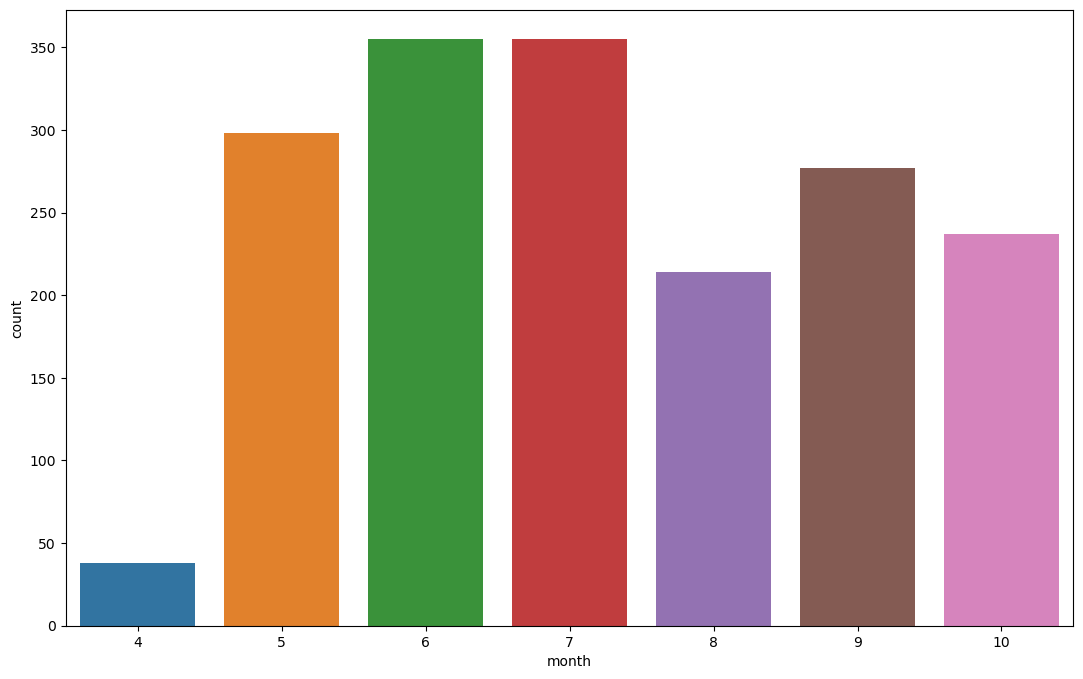

<Figure size 640x480 with 0 Axes>

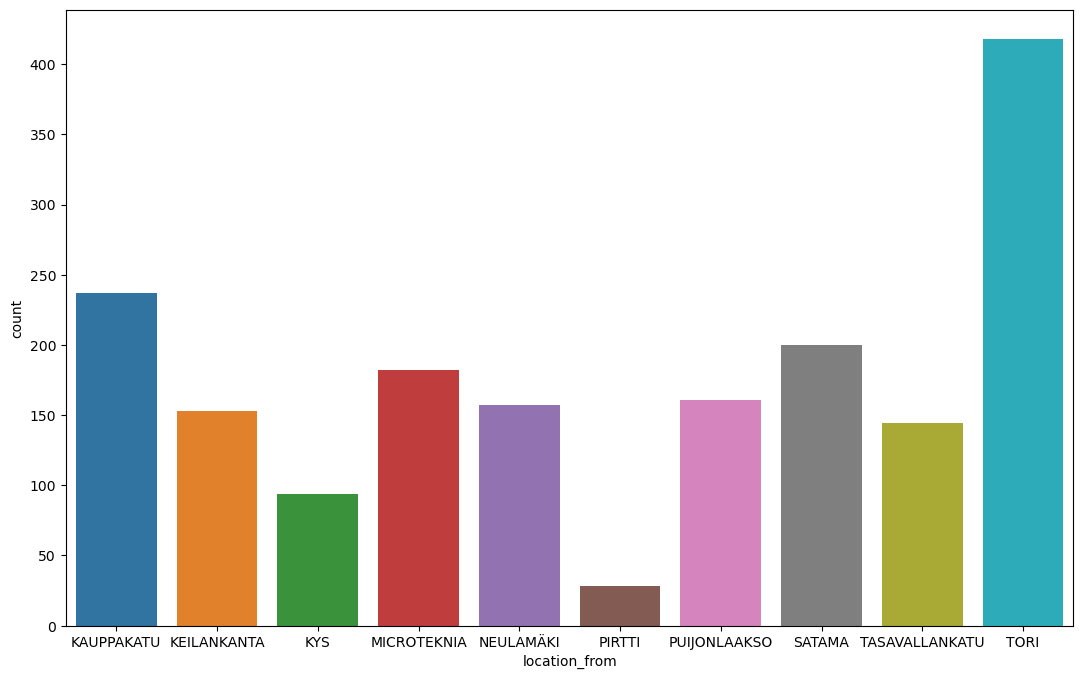

<Figure size 640x480 with 0 Axes>

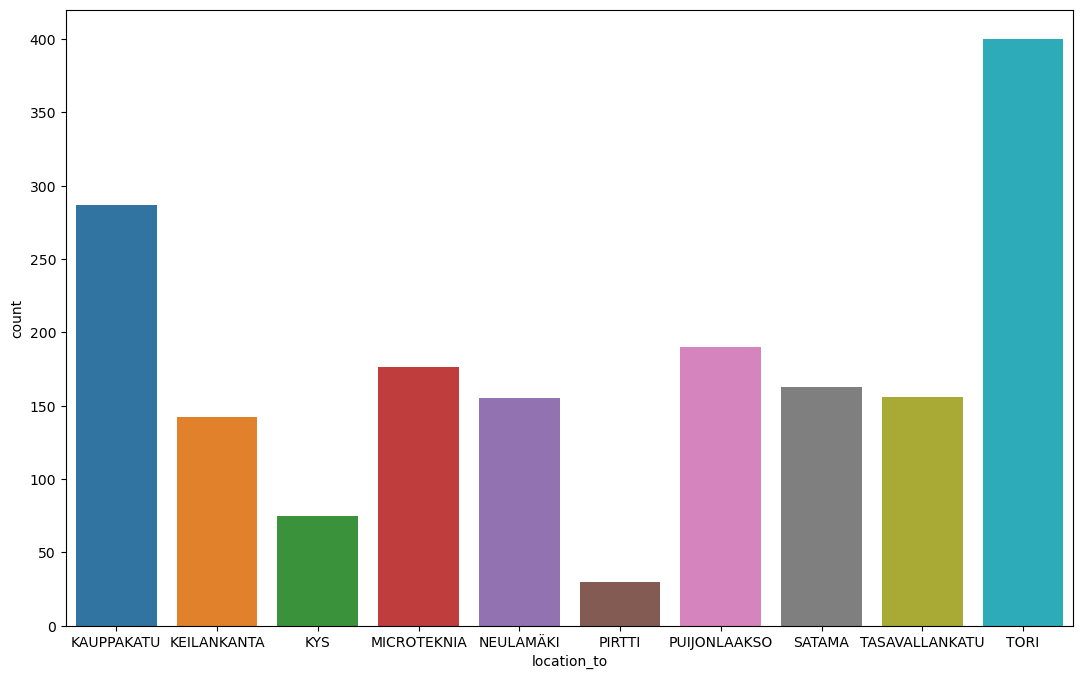

<Figure size 640x480 with 0 Axes>

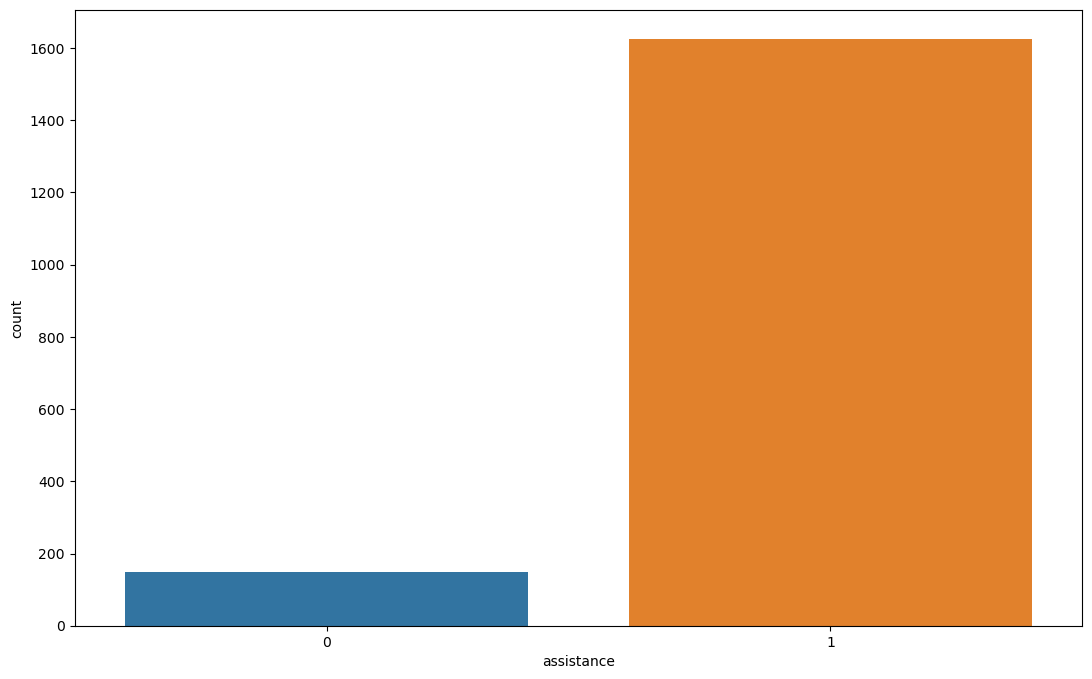

In [15]:

for col in categorical:
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots(figsize=(13, 8))
    sns.countplot(data=bikes, x=bikes[col], ax=ax)



Data filtering helps us eliminate noise, focus on key information, and find trends or outliers in your data. It also entails deleting unnecessary data, such as duplicates or irrelevant information, and leaving only the data required for analysis or decision-making. It also aids in faster computation and usage of less memory.

In the descriptive statistics mentioned before, the minimum distance was negative despite the fact that traveled distance cannot be negative. Thus, we determine how many occurrences have negative distance values.

In [16]:
negative_distance_val=bikes.loc[bikes["distance"]<0]
negative_distance_indx=negative_distance_val.index
print("Negative distances are :")
print(negative_distance_val.loc[negative_distance_indx, "distance"])
print("Number of negative distances ", negative_distance_val.shape[0])

Negative distances are :
23      -150
60       -20
62       -30
96       -10
125      -20
242     -180
284      -50
295      -60
318     -880
322      -10
384      -10
410      -10
420      -20
446      -30
462    -1770
474     -270
494     -180
520      -10
576    -1770
589      -20
639     -110
738      -60
808     -130
872     -870
977     -240
1002     -50
1046    -210
1061    -220
1076     -50
1095     -30
1145    -240
1259     -30
1342     -50
1446     -40
1563   -3380
1607    -230
1617     -80
1636   -1440
1680     -20
Name: distance, dtype: int64
Number of negative distances  39


We presume that the negative distance values were mistakenly flipped from positive to negative for the values that contain negative distance values. So we look for the absolute values(using abs() function) to make them positive and see if there are any negative values left. So we have chosen to replace those negative distances with a suitable value.

In [17]:
for i in negative_distance_indx:
    bikes["distance"].replace( bikes.loc[i,"distance"] , abs(bikes.loc[i,"distance"]),inplace=True)

#bikes.drop(negative_duration_indx, inplace=True)
#print("Number of negative distance :: ", bikes.shape[0])
#bikes.loc[negative_distance_indx, "distance"]=0
#bikes

Then we analyze if any negative distances are left.

In [18]:
print("Number of durations where distance < 0 is :: ",bikes.loc[bikes["distance"]<0, ["distance"]].shape[0], end="\n\n")

Number of durations where distance < 0 is ::  0



We also find out if there are any duplicate columns and drop any duplicate columns if present. So we first analyze to see if there are duplicates.

In [19]:
duplicateRows = bikes[bikes.duplicated()]
duplicateRows
#bikes.drop_duplicates()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
494,savonia,0.00,10,TORI,KAUPPAKATU,207.0,180,1,3.3,0.0
581,single,0.05,6,PUIJONLAAKSO,PUIJONLAAKSO,21.0,0,1,0.0,0.0
609,savonia,100.00,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,0,0.0,3.6
626,season,0.00,5,KAUPPAKATU,TASAVALLANKATU,351.0,1610,1,11.9,2.7
823,single,0.75,7,SATAMA,PUIJONLAAKSO,887.0,3360,1,45.0,5.7
887,savonia,0.00,9,NEULAMÄKI,MICROTEKNIA,250.0,1400,0,0.0,6.9
1199,season,0.00,7,KAUPPAKATU,KAUPPAKATU,28.0,0,1,0.0,0.0
1271,savonia,0.00,9,TORI,TORI,5.0,0,0,0.0,0.0
1313,single,0.05,7,TORI,TORI,46.0,0,1,0.0,0.0
1342,single,0.15,4,KAUPPAKATU,KAUPPAKATU,178.0,50,1,0.2,0.0


We find that even though, there might be multiple values of different columns common for different rows, there are no rows that are completely identical to another, and hence there is no use dropping any rows.

Then we find out how many instances have cost greater than 0 but distances traversed as less than 0. Since there are not so many instances, we drop that row

In [20]:
zero_distances=bikes.loc[(bikes["distance"]<=0 )& (bikes["cost"]>=0)]
print("No of instances where distance is 0 : ",zero_distances.shape[0])
zero_distances

No of instances where distance is 0 :  257


,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
9,savonia,0.00,9,TORI,TORI,5.0,0,0,0.0,0.0
13,single,0.10,5,TORI,TORI,64.0,0,1,0.0,0.0
14,single,0.10,5,KEILANKANTA,KEILANKANTA,86.0,0,1,0.0,0.0
18,season,0.00,6,TORI,TORI,233.0,0,1,0.0,0.0
21,season,0.00,6,TASAVALLANKATU,TASAVALLANKATU,38.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1723,single,0.05,5,TORI,TORI,59.0,0,1,0.0,0.0
1739,season,0.00,7,TORI,TORI,8.0,0,1,0.0,0.0
1743,season,0.00,8,MICROTEKNIA,MICROTEKNIA,79.0,0,1,0.0,0.0
1752,single,0.10,7,KYS,KYS,109.0,0,0,0.0,0.0


In [21]:
print("Shape before dropping rows :: ", bikes.shape[0])
bikes.drop(zero_distances.index, inplace=True)
print("Shape after dropping rows :: ", bikes.shape[0])
#bikes.loc[(bikes["distance"]>=0 )& (bikes["cost"]>=0)]

Shape before dropping rows ::  1774
Shape after dropping rows ::  1517


# **Data exploration**

It is vital to know what our customers are like and how they use our bikes. We are particularly interested in characterising the users of the three ticket types (single, season and savonia). Explore the data to discover how the rental bikes were used during the time period at which the data was collected. Remember to examine your results, summarise your findings and point out any interesting discoveries in your report.

## 1. For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

In [22]:
print("For each ticket type, ")
print("Total Duration Covered:\n",bikes.groupby("ticket")["duration"].sum(), end="\n\n")
print("Total Distance Covered:\n",bikes.groupby("ticket")["distance"].sum(),end="\n\n")
print("Total Cost Covered:\n",bikes.groupby("ticket")["cost"].sum(),end="\n\n")
print("Total number of trips made:")
print(bikes["ticket"].value_counts())


For each ticket type, 
Total Duration Covered:
 ticket
savonia    189776.0
season     317402.0
single     660892.0
Name: duration, dtype: float64

Total Distance Covered:
 ticket
savonia     499880
season     1315880
single     2574360
Name: distance, dtype: int64

Total Cost Covered:
 ticket
savonia    202.0
season       3.0
single     652.9
Name: cost, dtype: float64

Total number of trips made:
single     827
season     465
savonia    225
Name: ticket, dtype: int64


For each each ticket type, we calculated the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. We did these using groupby and value_counts function in pandas

According to these results, it is seen that the most number of trips are made by single tickets(827 times) where savonia are used the least(225 times). The cost seems to be the least for season, being 3 euros and mostly for single tickets being 652.9 euros. The distance(2574360 meters) and duration(660892 seconds) are most for single ticket types making them the most popular choice amongst the customers. And the least favoured by the customers is the savonia ticket where the total distance and duration traversed is 189776 meteres and 499880 seconds respectively and the total cost incurred is 202.0 euros.

In [23]:
#print("For the season tickets, cost paid is ",bikes[bikes["ticket"]=="single"].distance.sum())

## 2. For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time.

     ticket month  distance
0   savonia     4         0
1   savonia     5         0
2   savonia     6         0
3   savonia     7         0
4   savonia     8         0
5   savonia     9    244500
6   savonia    10    255380
7    season     4     30680
8    season     5    258550
9    season     6    244780
10   season     7    268150
11   season     8    218270
12   season     9    184840
13   season    10    110610
14   single     4     36170
15   single     5    495850
16   single     6    710240
17   single     7    594890
18   single     8    362560
19   single     9    240370
20   single    10    134280


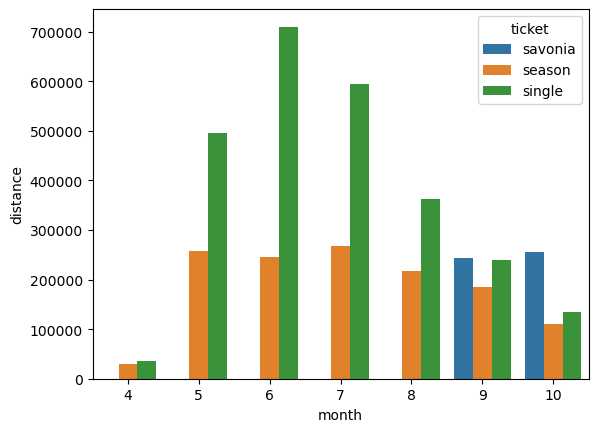

The monthly rental activity is given above for each ticket type


In [24]:
data = bikes.groupby(['ticket','month'])['distance'].sum().reset_index()
print(data)
sns.barplot(data=data,y="distance", x="month", hue="ticket", errorbar=None)
plt.show()
print("The monthly rental activity is given above for each ticket type")

In this visualization, x axis represents the month number(4-10) and y axis represents distance. According to this,
from April to June, it appears that the single ticket type was the most popular in terms of distance driven and savonia was not used. In may, the situation was the same but the overall usage increased for both, especially for single tickets. The figure remained the same for these two tickets for July, August too but the usage decreased gradually. However, in September, both savonia and single tickets were used for the same amount and they were more than season. In October, Savonia ticket usage peaked whilst season fell the most.


## 3. Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated.

In [25]:
arrived_bikes=bikes["location_from"].value_counts()
departed_bikes=bikes["location_to"].value_counts()

total_bike_deficit_top=(arrived_bikes-departed_bikes).sort_values(ascending=False)
total_bike_surplus_top=(arrived_bikes-departed_bikes).sort_values(ascending=False)

print("highest 3 total deficit of bikes\n",total_bike_deficit_top[-3:], end="\n\n")
print("highest 3 total surplus of bikes\n",total_bike_surplus_top[:3])

#arrived_bikes-departed_bikes.sort_values(ascending=False)

highest 3 total deficit of bikes
 TASAVALLANKATU   -13
PUIJONLAAKSO     -30
KAUPPAKATU       -46
dtype: int64

highest 3 total surplus of bikes
 SATAMA    38
KYS       19
TORI      15
dtype: int64


In this scenario, TASAVALLANKATU  has 13 missing bikes and PUIJONLAAKSO has 30, and KAUPPAKATU has 46 missing. On the other hand,
SATAMA, KYS, TORI has surplus of 38, 19, 15 bikes respectively as surplus.

In [26]:
total_bike_surplus_top

SATAMA            38
KYS               19
TORI              15
KEILANKANTA       11
MICROTEKNIA        6
NEULAMÄKI          2
PIRTTI            -2
TASAVALLANKATU   -13
PUIJONLAAKSO     -30
KAUPPAKATU       -46
dtype: int64

In this case, since SATAMA, KYS, TORI have the maximum surplus of bikes, these can be relocated to TASAVALLANKATU, PUIJONLAAKSO and KAUPPAKATU. Besides these 3, excess bikes from the ones that have surplus can be shifted to the deficit places. For example, KEILANKANTA, MICROTEKNIA, NEULAMÄKI also has excess bikes which can be relocated to the deficit ones.       


## 4. For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip.

In [27]:
net_energy_gain=bikes["energy_collected"]-bikes["energy_used"]
bikes["net_energy_gain"]=net_energy_gain
#net_energy_gain.plot.kde(x="net_energy_gain")

<Axes: xlabel='net_energy_gain', ylabel='Count'>

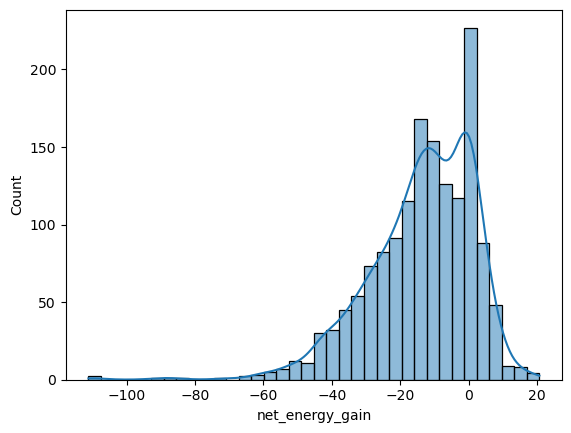

In [28]:
sns.histplot(bikes, x="net_energy_gain", kde=True)

From this visualization and interpretation of values, we can notice that the graph is shifted to the negative side. This indicates that there has been more energy consumed that collected in this trip. The positive net energy gain is only 20% and negative is 80%. Also most bikes tend to show that more energy is consumed when higher distance is traversed. So shifting bikes to places where higher distance will be traversed will be necessary for full battery usage in case of electric assistance usage.

## **Hypothesis testing**

There are a few hypotheses that we want to study about our customers and the trips they make. You need to examine whether the data has statistical evidence to support them. The tasks are detailed below. The other teams will want to double-check your analysis, so in your report remember to justify your choices of statistical tests, interpret the p-values, and make conclusions about the customers and their trips.

We'll perform some statistical analysis on the dataset's numerous variables. The p-value is a number derived from a statistical test. It expresses the chance of discovering a certain collection of observations if the null hypothesis is true. P-values are used in hypothesis testing to assist determine whether to reject the null hypothesis. Simply expressed, the lower the p-value, the more probable the null hypothesis is rejected. A null hypothesis exists in all statistical tests. The null hypothesis in most tests is that there is no association between the examined variables or that no difference exists between groups.




In [29]:
bikes.head()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,net_energy_gain
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7,-16.3
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3,-38.5
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9,-33.1
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1,-4.4
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2,-12.5


If the p-value is larger than your selected significance threshold (often 0.05), the null hypothesis is not rejected. We have no meaningful evidence to imply that the data does not follow a normal distribution in this example. As a result, we may infer that the data is about regularly distributed.
    We can reject the null hypothesis if the p-value is less than our specified significance level. This shows that there is substantial evidence that the data does not have a normal distribution. In this instance, we should investigate a different strategy or distribution that is more appropriate for our data.
    
 So for checking normality of distribution, we assume the significant theshold to be 0.05 and keep a function to test normality.

In [30]:
def test_normal(pval):
    if pval>=0.5:
        return True
    else:
        return False

This function returns True if p-value is greater than 0.05 and it returns False otherwise.

## 1. Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

In [31]:
duration_single=bikes.loc[bikes["ticket"]=="single"]["duration"]
p_duration_single=stats.shapiro(duration_single).pvalue
duration_season=bikes.loc[bikes["ticket"]=="season"]["duration"]
p_duration_season=stats.shapiro(duration_season).pvalue

print("p value of durations for single tickets: ", p_duration_single)
print("p value of durations for season tickets: ", p_duration_season)

p value of durations for single tickets:  1.401298464324817e-45
p value of durations for season tickets:  8.494552283799806e-10


Since the variables are quantitative variable (the observable values are numeric values) and not normally distributed, we need to use a suitable technique for them. If any of the distributions between two or more are false, we will use Mann Whitney U test to determine the p-value for our hypothesis and we will check whether or not to accept or reject the alternative hypothesis. In our case, both of the distributions were not normal, and hence, we used Mann Whitney U test.

In [32]:
if  ((test_normal(p_duration_single) | (test_normal(p_duration_season)))==False):
    U_test_val=stats.mannwhitneyu(duration_single,duration_season).pvalue
    print("U test value: ",U_test_val)
    if(U_test_val>=0.5):
        print("If the p-value is less than or equal to the significance level, the decision is to reject the null hypothesis. You can conclude that the difference between the population medians is statistically significant.")
    else:
        print("p-value of Mann–Whitney U-test is greater than 0.05, so there exists no significant difference between the travel times for the single and the season ticket type")
        print("If the p-value is greater than the significance level, the decision is to fail to reject the null hypothesis. You do not have enough evidence to conclude that the difference between the population medians is statistically significantly. ")


U test value:  0.28323369961199674
p-value of Mann–Whitney U-test is greater than 0.05, so there exists no significant difference between the travel times for the single and the season ticket type
If the p-value is greater than the significance level, the decision is to fail to reject the null hypothesis. You do not have enough evidence to conclude that the difference between the population medians is statistically significantly. 


## 2. Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

We need to find if there is any statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip. To investigate linear relationships between two numerical variables, the Pearson correlation test can be performed for normally distributed variables and spearman can be used for non-normally distributed variables.

In [33]:
# Calculate the correlation coefficient and p-value
if  (test_normal(p_duration_single) & test_normal(p_duration_season)):
    print("Since the data is normal, we will use pearsons correlation")
    correlation_coeff, p_val = stats.pearsonr(bikes["distance"], bikes["energy_used"])

else:
    print("Since the data is not normal, we will use spearman correlation")
    correlation_coeff, p_val = stats.spearmanr(bikes["distance"], bikes["energy_used"])


print("Correlation Coefficient : ",correlation_coeff)
print("P value : ",p_val)

if(p_val>=0.5):
    print("There is no statistically significant difference")
    print("There is no relationship between travel distance & average rate at which electricity is consumed during the trip")
else:
    print("There is statistically significant difference")
    print("The travel distance positively correlates with the average rate at which electricity is consumed during the trip")

Since the data is not normal, we will use spearman correlation
Correlation Coefficient :  0.8326462278716245
P value :  0.0
There is statistically significant difference
The travel distance positively correlates with the average rate at which electricity is consumed during the trip


<Axes: >

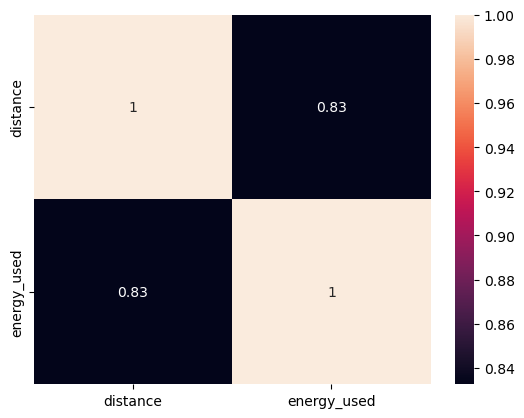

In [34]:
spearman_corr = bikes[['distance', 'energy_used']].corr(method="spearman")

sns.heatmap(spearman_corr, annot=True)

The null hypothesis states that no association exists between the variables. The result indicates that the null hypothesis may be rejected, since the correlation coefficient is 0.832 and the p-value is 0.05. Since in this case, the p value is less than 0.05, the null hypothesis can be rejected and the alternative one can be accepted and correlation coefficient is 0.85. The outcome indicates that the null hypothesis may be rejected and there is a high connection between the two variables.

## 3. Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

In [35]:
df=bikes
contigency = pd.crosstab(bikes['assistance'], bikes['ticket'])
print(contigency)

#Chi-square test of independence.
res = stats.chi2_contingency(contigency)
print('\n')
print("P-value: " + str(res.pvalue))


ticket      savonia  season  single
assistance                         
0                32      17      49
1               193     448     778


P-value: 5.363860741516123e-07


To find if the savonia ticket type differs from the others with respect to how often the electric assistance is used, we can prepare a contingency table and run a statistical test suitable for categorical values as we will be dealing with categorical values(variable the observable values are distinct classes).

The Chi-square test of independence is best suited for analyzing categorical data. The null hypothesis is that the group savonia is not different from other groups. A reasonable technique to do a chi-squared test is to first construct the contigency table. There is no need to verify for normalcy because the variables are categorical. Because the p-value is less than 0.05, the null hypothesis can be rejected. That is, ticket groups and electric assistance are not independent, i.e. there is statistical proof that there is a difference in electric assistance consumption between savonia ticket and other types.

P-value: 5.363860741516123e-07 < 0.05, therefore, there is statistically significant difference between electric assistance used by savonia with the two ticket types.

In [36]:
bikes.head(5)

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,net_energy_gain
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7,-16.3
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3,-38.5
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9,-33.1
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1,-4.4
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2,-12.5


## **Future directions**

The statistical analysis outlined above is definitely not perfect. There must be plenty of other hypotheses that could be examined to improve our rental operations, and the questions we ask above could perhaps be tweaked to better address the needs we have. Since the marketing, logistics and maintenance teams could not come up with other hypotheses or further adjustments, it is up to you to propose improvements to the analysis.

## (A) Formulate your own hypothesis about the use of rental electric bikes. Explain why your hypothesis would be important to explore. Describe how the hypothesis could be tested. (You do not have to perform the analysis.)

My Hypothesis:  
Is there a difference in distance traversed when electric assistance is used or not used for different ticket types?

In [37]:
bikes["net_energy_gain"].groupby(bikes["ticket"]).sum()

ticket
savonia    -2118.3
season     -7082.8
single    -11661.5
Name: net_energy_gain, dtype: float64

My hypothesis would be important to explore because as demonstrated by the output cell above because it is necessary to find out which option is more preferred for long distance traversals and for different ticket types. A very important factor contributing to the total distance traversed can electric assistance usage and hence it could be necessary to explore this.



## The steps for testing this hypothesis:

    1. First we will find out if the distance variable and electric assistance variable is normal by using Shapiro Wilk Test since they are both numerical variables.
    
    2. Then find out if there exists any correlation between them using spearman method if any of the variables are not normally distributed and pearson correlation if they are both normally distributed.
    
    3. If the p value comes out to be less than a significant level(say 0.05), then our hypothesis will be true and otherwise can be rejected.
    
    4. If the correlation is negative, there is a negative correlation between distance and electric assistance usage(yes or no), and if the correlation is positive, there is a positive correlation and if the result is 0, there is no correlation between these two variables.
    
    5. We will conduct these steps for all 3 ticket types(single, season and savonia).
    